In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


r1 = 0.5
r2 = 0.5
K1 = 1000
K2 = 1000
sig1 = 0.01
sig2 = 0.05
gamma1 = 0.9
gamma2 = 0.95


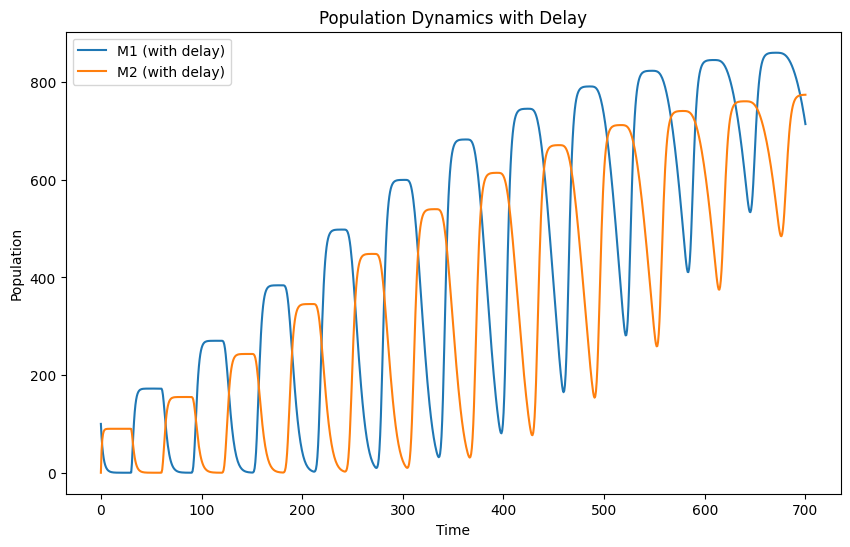

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d


def system_with_delay(y, t, history):
    M1, M2 = y
    
    # Get delayed values (tau time units ago)
    tau1 = 30  # You can adjust this delay value
    tau2 = 30
    M1_delayed = history(t - tau1)[0]
    M2_delayed = history(t - tau2)[1]
    
    dM1_dt = r1 * M1 * (1 - M1 / K1) - sig1 * M1 + gamma2 * M2_delayed - gamma1 * M1
    dM2_dt = -sig2 * M2 + gamma1 * M1_delayed - gamma2 * M2
    
    return [dM1_dt, dM2_dt]

# Solve the system with delay
t = np.linspace(0, 700, 1000)
initial_conditions = [100, 0]

def solve_with_delay(t, initial_conditions):
    solution = [initial_conditions]
    times = [0]
    
    def history(t):
        if t <= 0:
            return initial_conditions
        else:
            return interp1d(times, np.array(solution), axis=0, bounds_error=False, fill_value="extrapolate")(t)
    
    for t_i in t[1:]:
        y = odeint(system_with_delay, solution[-1], [times[-1], t_i], args=(history,))
        solution.append(y[-1])
        times.append(t_i)
    
    return np.array(solution)

solution_with_delay = solve_with_delay(t, initial_conditions)
M1_delayed, M2_delayed = solution_with_delay.T

plt.figure(figsize=(10, 6))
plt.plot(t, M1_delayed, label='M1 (with delay)')
plt.plot(t, M2_delayed, label='M2 (with delay)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Dynamics with Delay')
plt.show()